# Distributions and Central Tendency

This notebook provides some examples of different types of data distributions, and their effect on measures of central tendency.

I encourage you to experiment with this notebook to see what happens with different values for data distributions.

## Setup

We need the usual imports; we also want to import `numpy` and `scipy.stats`, so we can get some probability distributions.  We will use those to generate data to see the effects.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as spstats

We're going to work with NumPy arrays quite a bit, and not just Pandas series.  Many of the Pandas methods, such as `mean`, have NumPy equivalents as functions, like `np.mean`.

## Symmetric Distributions

One of the most prevalent distributions for understanding data is the *normal distribution*.  This is a symmetric continuous distribution with a specified mean and standard deviation (or variance).  The `np.random.randn` function allows us to generate 'standard normal' numbers, which have mean 0 and variance 1: 

In [2]:
normals = np.random.randn(1000)

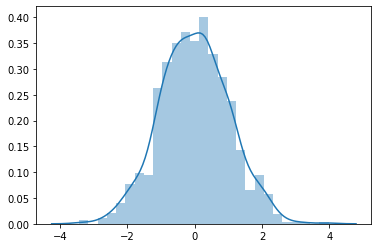

In [3]:
sns.distplot(normals)

Our list of normals is a NumPy array, not a Pandas series; we can convert it to a series and `describe` it:

In [4]:
pd.Series(normals).describe()

count    1000.000000
mean        0.002239
std         1.021287
min        -3.425891
25%        -0.694896
50%        -0.010141
75%         0.688191
max         3.972368
dtype: float64

We can see here that the mean and the median (50%) are both approximately 0, and the standard deviation is approximately 1 - these are standard normals!  Mean and median differ from 0 slightly due to random variation.  But the data are symmetric, without significant outliers, so they mean and median are very comparable.

If we want another normally distributed variable, the way we get that is to generate standard normals, multply them by the standard deviation, and add the mean.  NumPy arrays support vectorized arrays, so we can multiply the entire array by $\sigma = 10$ and add $\mu = 50$:

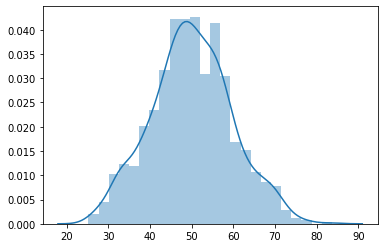

In [5]:
o_normals = np.random.randn(1000) * 10 + 50
sns.distplot(o_normals)

In [6]:
pd.Series(o_normals).describe()

count    1000.000000
mean       49.978675
std         9.733520
min        25.174808
25%        43.663645
50%        49.850156
75%        56.025603
max        83.659707
dtype: float64

We can plot the mean and median too:

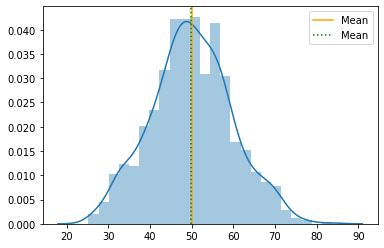

In [7]:
sns.distplot(o_normals)
plt.axvline(np.mean(o_normals), 0, 1, color='orange', label='Mean')
plt.axvline(np.median(o_normals), 0, 1, color='green', linestyle=':', label='Mean')
plt.legend()

Python *functions* let us encapsulate operations. We're going to plot distributions, means, and medians a lot in this notebook, so let's make a function that does that:

In [8]:
def show_dist(vals):
    sns.distplot(vals)
    plt.axvline(np.mean(vals), 0, 1, color='orange', label='Mean')
    plt.axvline(np.median(vals), 0, 1, color='green', linestyle=':', label='Mean')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()

We also need a way to show exponential plots. Let's make a rank-size plot function:

In [9]:
def show_ranksize(vals):
    # rank negative values, so the largest is 1
    # make a data frame
    df = pd.Series({'value': vals, 'rank': spstats.rankdata(-vals)})
    df = df.drop_duplicates()
    sns.scatterplot('rank', 'value', data=df)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Rank')
    plt.ylabel('Value')
    plt.axhline(np.mean(vals), 0, 1, color='orange', label='Mean')
    plt.axhline(np.median(vals), 0, 1, color='green', linestyle=':', label='Mean')
    plt.legend()

### Beta Distribution

The normal distribution is not the only symmetric distribution of data.  Let's consider a symmetric Beta distribution - the Beta describes data that is on the range $[0,1]$.

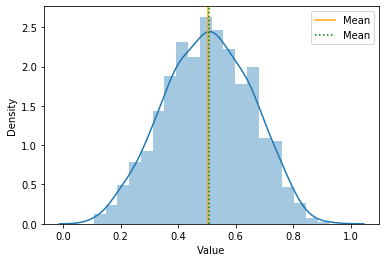

In [10]:
betas = np.random.beta(5, 5, 1000)
show_dist(betas)

In [11]:
pd.Series(betas).describe()

count    1000.000000
mean        0.503387
std         0.149459
min         0.106838
25%         0.399457
50%         0.506551
75%         0.611715
max         0.926738
dtype: float64

These data are also symmetric, and we can see again that the mean and median are comparable.

Let's make an asymmetric beta!

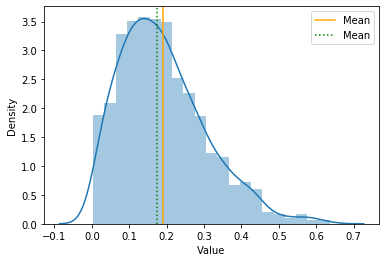

In [12]:
a_betas = np.random.beta(2, 8, 1000)
show_dist(a_betas)

In [13]:
pd.Series(a_betas).describe()

count    1000.000000
mean        0.189874
std         0.115405
min         0.003732
25%         0.103820
50%         0.173399
75%         0.256157
max         0.636578
dtype: float64

These data are slightly skewed, but but the skew is not very strong.  The median is left of the mean by a little bit.

## Skewed Distributions

Let's look at more strongly skewed distributions.  The gamma distribution is left-bounded at 0, and extends to the right - it usually has some skew:

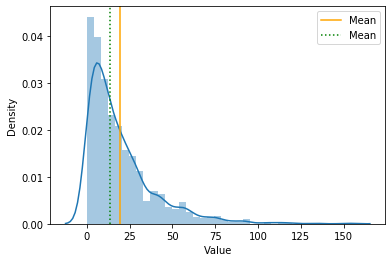

In [14]:
gammas = np.random.gamma(1, 20, 1000)
show_dist(gammas)

In [15]:
pd.Series(gammas).describe()

count    1000.000000
mean       19.648845
std        19.826221
min         0.012756
25%         5.800942
50%        13.395561
75%        26.740432
max       152.957310
dtype: float64

We see a mmore significant difference here.

The *log normal* distribution is when the logarithm of the data is normally distributed:

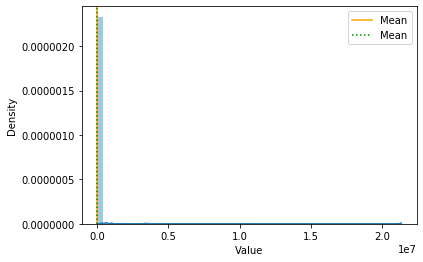

In [16]:
lns = np.random.lognormal(5, 3, 1000)
show_dist(lns)

In [17]:
pd.Series(lns).describe()

count    1.000000e+03
mean     3.226375e+04
std      6.845770e+05
min      8.147719e-03
25%      2.156369e+01
50%      1.742679e+02
75%      1.345702e+03
max      2.132104e+07
dtype: float64

What fraction of values are less than the mean? (What is your guess?)

In [18]:
np.mean(lns < np.mean(lns))

0.961

Wow! Let's look at this on a log-log rank-size plot:

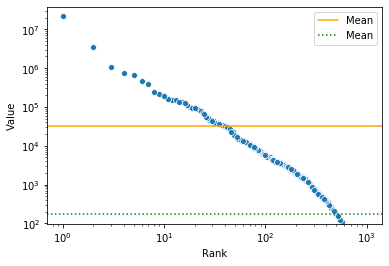

In [19]:
show_ranksize(lns)

Another strongly-skewed distribution, that is a true power law, is the Pareto distribution:

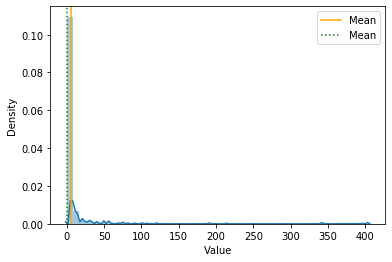

In [20]:
ps = np.random.pareto(1, 1000)
show_dist(ps)

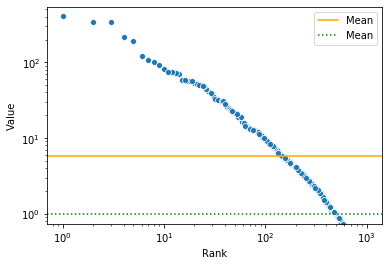

In [21]:
show_ranksize(ps)

In [22]:
pd.Series(ps).describe()

count    1000.000000
mean        5.711190
std        24.311400
min         0.000992
25%         0.329624
50%         0.984343
75%         2.990564
max       404.600411
dtype: float64

The Pareto distribution is highly skeewed, with that very strong outlier. What is the percentile of the mean? It'll be way more than 75%!

In [23]:
np.mean(ps < np.mean(ps))

0.854

Ouch.